# Project: TMDB Movie Dataset Analysis



## Table Of Contents:
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#ask">Questions About Dataset</a></li>
    <li><a href="#wrangle">Wrangle Data</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions Of The Analysis</a></li>
    <li><a href="#result">Communicate The Result</a></li>
    <li><a href="#ref">Reference</a></li>
</ul>

<div id="intro"></div>

## Introduction:

<br></br>
> <p style="font-size:16px;">A commercially successful movie not only entertains audience, but also brings tremendous profit to movie production companies. In this project, we are going to explore 'TMDB movie dataset' from Kaggle which contains about 10000 movies, spanning across 56 years with 21 variables such as popularity, cast, genres, ratings, budget, revenue etc.</p>




<div id="ask"></div>

## Questions About Dataset:

<br></br>
<div style="font-size:16px">
    
> 1. What are the numbers of movies released every year? Which year has highest number of movies released?
2. Which movies are with higher budgets?
3. Which movies are with higher revenues?
4. Which movies are with higher profits? Which movies with highest and lowest profits?
5. What are the top longer movies? What is the longest movies?
6. Which are the higher rated movies?
7. What is the trend of profit rate over year to year?
8. What is the trend of average runtime over year to year? Does runtime affect the rating of movie?
9. In which year more popular movies released?
10. How popularity of a movie is releated to budget and rating?
11. How revenue is releated to budget, rating and popularity?
12. How profit of a movie is releated to budget and popularity of that movie?
13. With which genre maximum number of movies released? What are the number of movies released with all other genres?
14. Which are the more popular genres over the last three years? What are trends of the genres from year to year?
15. Which actor did maximum number of movies? Who are the top actors according to the number of movies he(she) did? Who are the top profitable actors?
16. Which production company releassed maximum number of movies? Which are the top production companies in movie making?
17. How much profits top production companies earned for the life time?
18. Which director directed maximum number of movies? Who are the top directors?
19. Which are the most popular keywords?
20. What are the correlations between budget, revenue, profit, vote_average and popularity?
    
</div>

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import plot
from wordcloud import WordCloud

pd.set_option("display.max_columns", None)
%matplotlib inline

from pkg import analysis_fn as asn

<div id="wrangle"></div>

## Wrangle Data:

<br></br>

<div style="font-size:16px">
    
>In this process of data analysis we do the following operations to get good quality and well structured data -
> 
><ul>
    <li><a href="#gather">Gather Data</a></li>
    <li><a href="#assess">Assess Data</a></li>
    <li><a href="#clean">Clean Data (if necessary)</a></li>
</ul>


</div>

<div id="gather"></div>

### Gather Data:

In [2]:
# Load the data from CSV file
movies_df = pd.read_csv('data/tmdb-movies.csv')
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<div id="assess"></div>

### Assess Data:

<div style="font-size:16px">

> We have to access data to get an overall idea about the DatFrame in which we stored the necessary values. An overall idea 
helps us to clean the data according to the necessity and start our analysis.

</div>

In [3]:
# get overall ddataframe info
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# show first 10 rows of dataframe
movies_df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,saving the world|artificial intelligence|cybor...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,based on novel|mars|nasa|isolation|botanist,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",assistant|aftercreditsstinger|duringcreditssti...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment

In [5]:
# show last 10 rows of the dataframe
movies_df.tail(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10856,20277,tt0061135,0.140934,0,0,The Ugly Dachshund,Dean Jones|Suzanne Pleshette|Charles Ruggles|K...,NaN,Norman Tokar,A HAPPY HONEYMOON GOES TO THE DOGS!...When a G...,great dane|dachshund,The Garrisons (Dean Jones and Suzanne Pleshett...,93,Comedy|Drama|Family,Walt Disney Pictures,2/16/66,14,5.7,1966,0.000000,0.0
10857,5921,tt0060748,0.131378,0,0,Nevada Smith,Steve McQueen|Karl Malden|Brian Keith|Arthur K...,NaN,Henry Hathaway,Some called him savage- and some called him sa...,repayment|revenge|native american|wild west|ha...,Nevada Smith is the young son of an Indian mot...,128,Action|Western,Paramount Pictures|Solar Productions|Embassy P...,6/10/66,10,5.9,1966,0.000000,0.0
10858,31918,tt0060921,0.317824,0,0,"The Russians Are Coming, The Russians Are Coming",Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...,NaN,Norman Jewison,IT'S A PLOT! ...to make the world die laughing!!,cold war|russian|new england,"Without hostile intent, a Soviet sub runs agro...",126,Comedy|War,The Mirisch Corporation,5/25/66,11,5.5,1966,0.000000,0.0
10859,20620,tt0060955,0.089072,0,0,Seconds,Rock Hudson|Salome Jens|John Randolph|Will Gee...,NaN,John Frankenheimer,NaN,plastic surgery|suspense,A secret organisation offers wealthy people a ...,100,Mystery|Science Fiction|Thriller|Drama,Gibraltar Productions|Joel Productions|John Fr...,10/5/66,22,6.6,1966,0.000000,0.0
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,monster|carry on|horror spoof,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.000000,0.0
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [6]:
# show concise summery of the neumeric columns
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# See if there is any duplicated value
movies_df.duplicated().sum()

1

In [8]:
# See which columns have how much NULL values
movies_df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
# See number of unique values each column has
movies_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

<div id="clean"></div>

### Clean Data:

<div style="font-size:16px">
    
> After a sneak peak of the dataframe, I summerised the necessary steps for data cleaning as follows -
><ul>
    <li><a href="#unused">Drop uncessary columns</a></li>
    <li><a href="#duplicate">Drop duplicate row</a></li>
    <li><a href="#format">Format release date</a></li>
    <li><a href="#modify">Modify inappropriate values</a></li>
    
</ul>
</div>

<div id="unused", style="font-size:16px">

**Remove columns those are not usefull:**
    
> We can see that there are 21 columns in the dataframe but there are few columns those are not required in the data analysis 
process like: imdb_id, budget, revenue, homepage, tagline, overview etc. so we can remove those columns from the dataframe.

</div>

In [10]:
# Drop unnecessary columns
drop = ['imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'overview']
movies_df.drop(drop, axis=1, inplace=True)
print('The shape of the dataframe after removing unnecessary collumns: ', movies_df.shape)

The shape of the dataframe after removing unnecessary collumns:  (10866, 15)


<div id="duplicate", style="font-size:16px">
    
**Remove duplicate row:**
    
> There is one duplicate row that is not required for the analysis, so its safe to remove that from the dataframe.

</div>


In [11]:
# drop duplicate row
movies_df.drop_duplicates(inplace=True)
print('After droping duplicate row (row, column): ', movies_df.shape)

After droping duplicate row (row, column):  (10865, 15)


<div id="format", style="font-size:16px">

**Chage datatype of Release Date**

> In the daframe the release_date is a string object but we need to convert it to datetime object.
</div>

In [12]:
# change datatype of release_date column from object to datetime
movies_df.release_date = pd.to_datetime(movies_df.release_date)
movies_df.release_date.head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

<div id="modify", style="font-size:16px">

**Modify inappropriate values**

> We can see above that in the dataframe there are lots of movies where **budget_adj**, **revenue_adj** annd **runtime** have a value of '0'. But the fact is budget of a movie that was made cant be '0', it may be relevant information was not stored peoperly. On the otherside a released movie cant has '0' revenue, it may either movie is not released or correct information was not stored. Again a movie cant has '0' runtime. So we modify the values later on according to the necessity during analysis.

</div>

In [13]:
# print the number of rows where budget_adj and revenue_adj has zero values
print('Number of zero values in budget_adj', movies_df.query("budget_adj==0").shape[0])
print('Number of zero values in revenue_adj', movies_df.query("revenue_adj==0").shape[0])

Number of zero values in budget_adj 5696
Number of zero values in revenue_adj 6016


In [14]:
# See dataframe after cleaning process
movies_df.head()

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [15]:
# get general overview of the dataframe
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   original_title        10865 non-null  object        
 3   cast                  10789 non-null  object        
 4   director              10821 non-null  object        
 5   keywords              9372 non-null   object        
 6   runtime               10865 non-null  int64         
 7   genres                10842 non-null  object        
 8   production_companies  9835 non-null   object        
 9   release_date          10865 non-null  datetime64[ns]
 10  vote_count            10865 non-null  int64         
 11  vote_average          10865 non-null  float64       
 12  release_year          10865 non-null  int64         
 13  budget_adj      

<div id="eda"></div>

## Exploratory Data Analysis(EDA):

<div style="font-size:16px">

> We trimmed and cleaned our data and ready to move further. Here in this process of data analysis we compute statistics and 
create visualization about relationships between various factors with the goal of addressing the research questions that I 
posted in questions section.

</div>

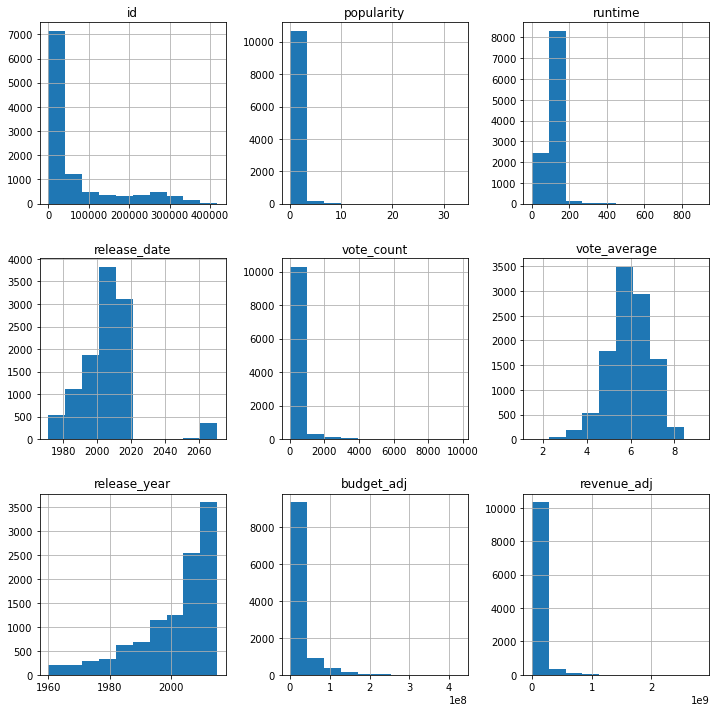

In [16]:
# We first explore quantitative features of movies. And, draw histogram for all of them
movies_df.hist(figsize=(12,12));

<br></br>

### Create necessary functions for our analysis

### Q1: What are the numbers of movies released every year? Which year has highest number of movies released?

In [17]:
# create groupby object by 'release_year' and count numbers of movies released every year and store that in series
movie_count = movies_df.groupby('release_year').count().id
movie_count.tail()

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64

Text(0, 0.5, 'Number of movies released')

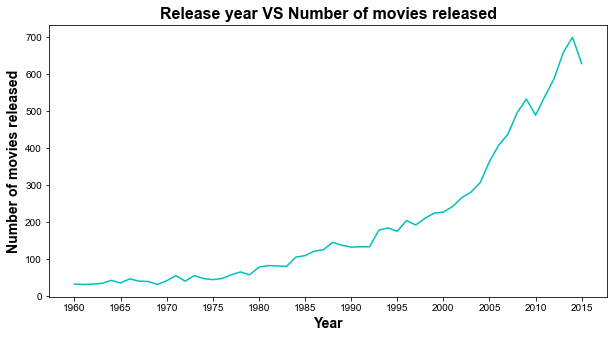

In [18]:
# create a plot with movie_count series
movie_count.plot(color='c', xticks=np.arange(1960, 2016, 5), figsize=(10, 5));
sns.set_style('whitegrid')
plt.title('Release year VS Number of movies released', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of movies released', fontsize=14, fontweight='bold')

> From the above plot we can see the numbers of movies released per year is generally increased with the year. And, in 2014 heightest number of movies released i.e. 700 and followed by 2013(659) and 2015(629)

<br></br>

### Q2: Which movies are with higher budgets?

> In the dataset there are many movies with '0' budget, it may happens when movie is not created or the actual value is not entered. So we replace the '0' values in 'budget_adj' column with NAN to do our analysis.

In [19]:
# replace the value 0 in 'budget_adj' column with NaN to get the actual max and min values from the column.
movies_df.budget_adj.replace(0, np.NAN, inplace=True)

In [20]:
# get heightest and lowest budget movies
asn.max_min(movies_df, 'budget_adj')

original_title,The Warrior's Way,Fear Clinic
id,46528,287524
popularity,0.25054,0.177102
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Sngmoo Lee,Robert Hall
keywords,assassin|small town|revenge|deception|super speed,phobia|doctor|fear
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Horror
production_companies,Boram Entertainment Inc.,Dry County Films|Anchor Bay Entertainment|Movi...
release_date,2010-12-02 00:00:00,2014-10-31 00:00:00


> **The Warrior's Way** is the highest budget movie with **\$425M** and **Fear Clinic** is the lowest budget movie with **$0.92**

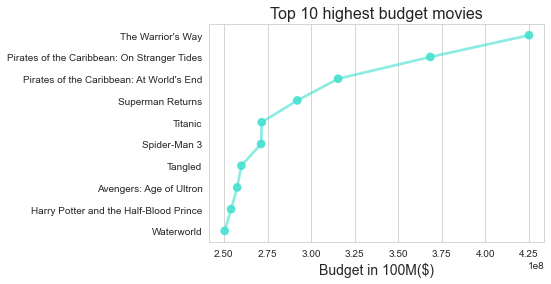

In [21]:
# makke plot for top 10 highest budget movies
asn.sns_plot(movies_df, 'budget_adj', 'Top 10 highest budget movies', 'Budget in 100M($)', 'Turquoise')

> Above plot shows top 10 highest budget movies.

### Q3: Which movies are with higher revenues?

>In the dataset there are many movies with '0' revenue, it may happens when movie is not released. But without so much 
clarification about that we cant change values to NaN. So in this case we keep those values unchanged and make analysis.

In [22]:
# find the movies with maximum and minimum revenue
asn.max_min(movies_df, 'revenue_adj')

original_title,Avatar,Wild Card
id,19995,265208
popularity,9.432768,2.93234
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
director,James Cameron,Simon West
keywords,culture clash|future|space war|space colony|so...,gambling|bodyguard|remake
runtime,162,92
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Current Entertainment|Lionsgate|Sierra / Affin...
release_date,2009-12-10 00:00:00,2015-01-14 00:00:00


> From the aboe table we can see **Avatar** is the highest revenue generating movie with **\$2.8B** and **Wild Card** is the lowest revenue generating movie with **$0.0**

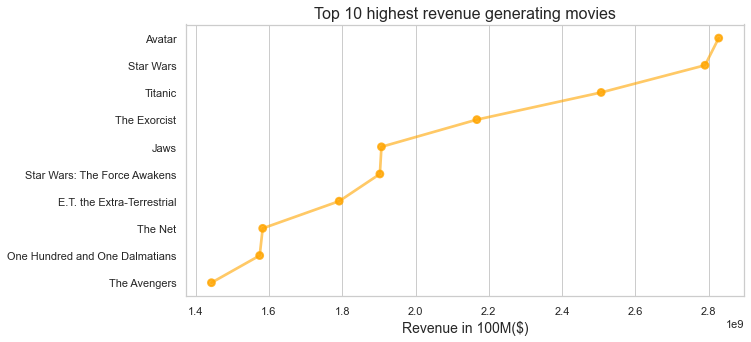

In [23]:
# make plot of top 10 revenue generating movies
asn.sns_plot(movies_df, 'revenue_adj', 'Top 10 highest revenue generating movies', 'Revenue in 100M($)', 'orange')

> Above plot shows top 10 highest revenue generating movies.

### Q4: Which are the most profitable movies? Which are the movies with highest and lowest profits?

In [24]:
# to see profit of each movie we have to create a new column by substracting budget from revenue.
movies_df['profit'] = movies_df.revenue_adj - movies_df.budget_adj

In [25]:
# See max and min values from 'profit' column
asn.max_min(movies_df, 'profit')

original_title,Star Wars,The Warrior's Way
id,11,46528
popularity,12.037933,0.25054
original_title,Star Wars,The Warrior's Way
cast,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,George Lucas,Sngmoo Lee
keywords,android|galaxy|hermit|death star|lightsaber,assassin|small town|revenge|deception|super speed
runtime,121,100
genres,Adventure|Action|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Lucasfilm|Twentieth Century Fox Film Corporation,Boram Entertainment Inc.
release_date,1977-03-20 00:00:00,2010-12-02 00:00:00


> **Star Wars** is the most profitable movie with **\$2.75B** profit and **The Warrior's Way** is the most unprofitable movie with **\$414M** loss.

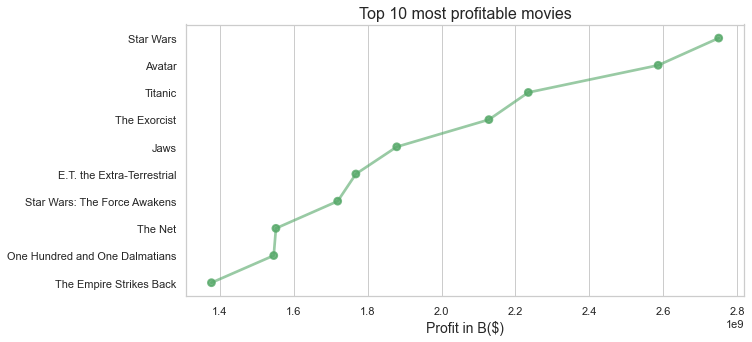

In [26]:
# create plot to visualize top 10 profitable movies.
asn.sns_plot(movies_df, 'profit', 'Top 10 most profitable movies', 'Profit in B($)', 'g')

> The plot shows top 10 most profitable movies over the time.

### Q5: What are the top longer movies? What is the longest movies?

> There are few movies which have '0' runtime which is not possible. So, for the shake of our analysis we replace '0' with NAN.

In [27]:
# replace '0' with NAN in 'runtime' column.
movies_df.runtime.replace(0, np.NAN, inplace=True)

In [28]:
# get the max and min runtime of the movies over the time
asn.max_min(movies_df, 'runtime')

original_title,The Story of Film: An Odyssey,Fresh Guacamole
id,125336,142563
popularity,0.006925,0.078472
original_title,The Story of Film: An Odyssey,Fresh Guacamole
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,NaN
director,Mark Cousins,PES
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,NaN
runtime,900.0,2.0
genres,Documentary,Animation
production_companies,NaN,NaN
release_date,2011-09-03 00:00:00,2012-03-02 00:00:00


> **The Story of Film: An Odyssey** is the longest movie with **15 hrs** runtime and **Fresh Guacamole** is the shortest movie with **2 min** runtime.

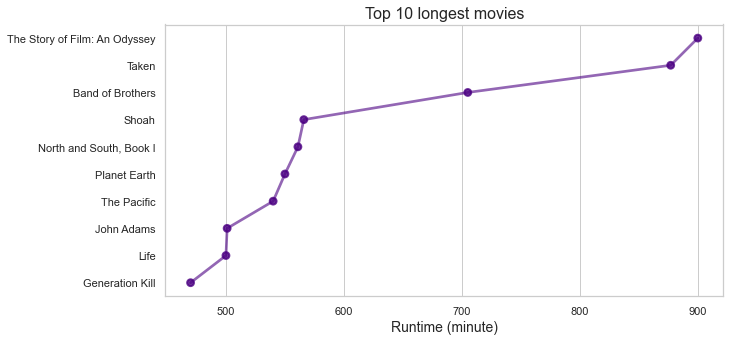

In [29]:
# create plot for top 10 lonest movies
asn.sns_plot(movies_df, 'runtime', 'Top 10 longest movies', 'Runtime (minute)', 'indigo')

> Above plot shows top 10 longest movies over the time.

### Q6: Which are the higher rated movies?

In [30]:
# See the highest and lowest rated movies
asn.max_min(movies_df, 'vote_average')

original_title,The Story of Film: An Odyssey,Transmorphers
id,125336,25055
popularity,0.006925,0.12112
original_title,The Story of Film: An Odyssey,Transmorphers
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...
director,Mark Cousins,Leigh Scott
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,futuristic
runtime,900.0,86.0
genres,Documentary,Action|Adventure|Science Fiction
production_companies,NaN,"Asylum, The"
release_date,2011-09-03 00:00:00,2007-06-26 00:00:00


> **The Story of Film: An Odyssey** is the highest rated movie with **9.2** rating and **Transmorphers** is the lowest rated movie with **1.5** ratinng.

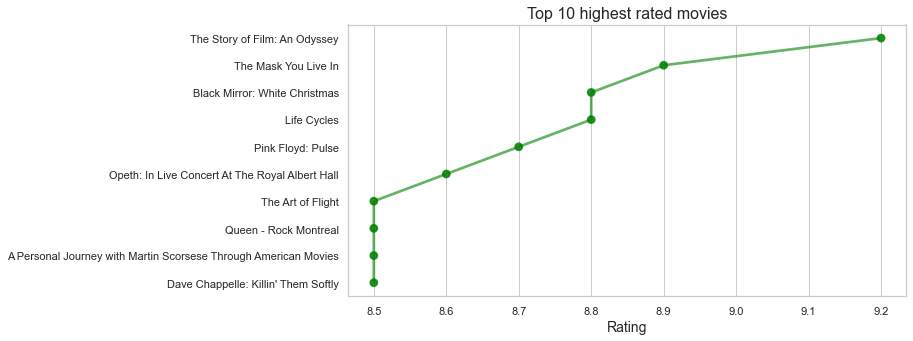

In [31]:
# make a plot for top 10 highest rated movie
asn.sns_plot(movies_df, 'vote_average', 'Top 10 highest rated movies', 'Rating', 'green')

> Above plot shows the top 10 highest rated movies.

### Q7: What is the trend of profit rate over year to year?

> Here we do year-wise analysis of profits based on the average profits earned in each year. Create roupby object with release_year and then take average profit of each year and create a line plot. 

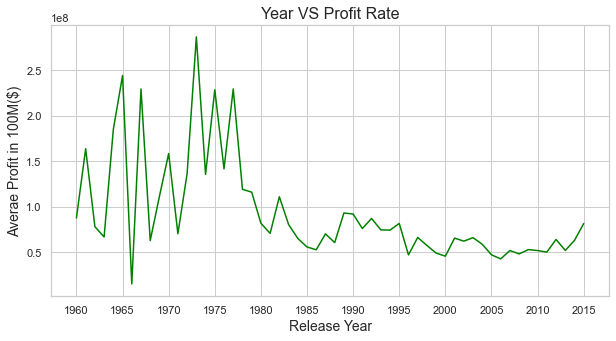

In [32]:
# call the cmp_line function to create the line plot
asn.cmp_line(movies_df, 'release_year', 'profit', np.arange(1960, 2016, 5), 
         'Year VS Profit Rate', 'Release Year', 'Averae Profit in 100M($)', 'green')

> From the above plot we can see that though there is no particular trend of profit with Year, in the range of 1960 to 1980 profit rate was comparetivelly high.

### Q8: What is the trend of average runtime over year to year? Does runtime affect the rating of movie?

> Here we take the average runtime of movies in each year and see the trend with the year is upward or downward. And also see if there is anyy correlation between runtime and rating of a movie.

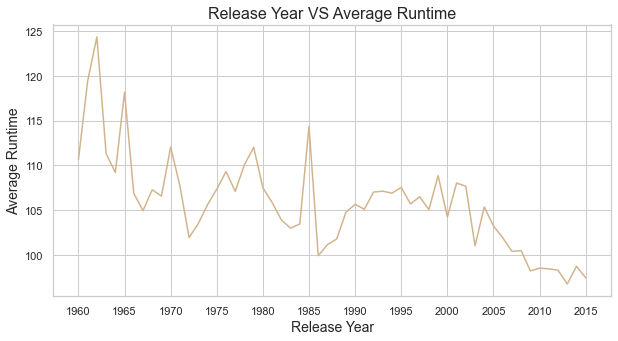

In [33]:
# call cmp_line function to see average runtime trend aver the years
asn.cmp_line(movies_df, 'release_year', 'runtime', np.arange(1960, 2016, 5),
         'Release Year VS Average Runtime', 'Release Year', 'Average Runtime', 'Tan')

> Fromthe above plot we can see that movie runtime is coming down with the years. And, in recent years average runtime is less compared to previous years. And, in the year of 1962 average runtime was higher compared to other years.

In [34]:
# Here we see is there any relationship between movie rating and movie runtime. As, movie runtime spread over wide range of
# time so, to get a nice overview of the relationship we cut the whole range into small ranges and take that to draw the plot.
movies_df['runtime_level'] = 'More than 150 min'
movies_df.loc[(movies_df.runtime>0) & (movies_df.runtime<31), 'runtime_level'] = 'Less than 30 min'
movies_df.loc[(movies_df.runtime>30) & (movies_df.runtime<61), 'runtime_level'] = '31 min - 60 min'
movies_df.loc[(movies_df.runtime>60) & (movies_df.runtime<91), 'runtime_level'] = '61 min - 90 min'
movies_df.loc[(movies_df.runtime>90) & (movies_df.runtime<121), 'runtime_level'] = '91 min - 120 min'
movies_df.loc[(movies_df.runtime>120) & (movies_df.runtime<151), 'runtime_level'] = '121 min - 150 min'

movies_df.runtime_level.head()

0    121 min - 150 min
1     91 min - 120 min
2     91 min - 120 min
3    121 min - 150 min
4    121 min - 150 min
Name: runtime_level, dtype: object

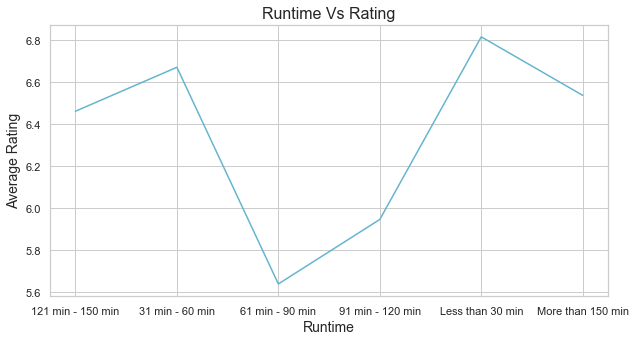

In [35]:
# call the cmp_line function to make the plot
asn.cmp_line(movies_df, 'runtime_level', 'vote_average', None, 
         'Runtime Vs Rating', 'Runtime', 'Average Rating', 'c')

> From the above plot we can see that movies with **Less than 30 min** runtime are highest rated and with **31 min to 60 min** runtime are second highest rated movies. And, movies with **61 min to 90 min** are lowest rated movies.

### Q9: In which year more popular movies released?

> Here we analysis in which year more number of popular movies released. We group the data by release_year and then take averages of the popularity of the movies in each year and then plot.

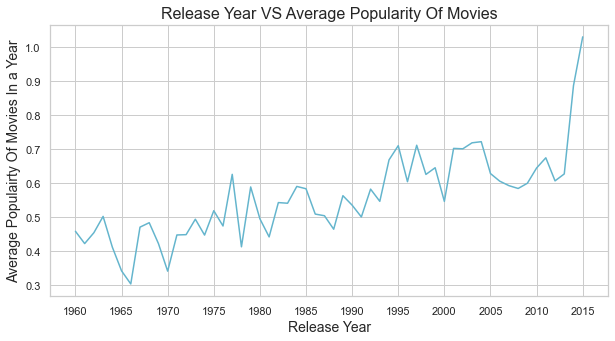

In [36]:
# call cmp_line function to make the plot
asn.cmp_line(movies_df, 'release_year', 'popularity', np.arange(1960, 2016, 5),
        'Release Year VS Average Popularity Of Movies', 'Release Year', 'Average Populairty Of Movies In a Year', 'c')

> From the above plot we can see that with year there is an upward trend of movie popularity. Means, with time more popular movies has been released.

### Q10: How popularity of a movie is releated to budget and rating?

> Here we analyse the relationship between popularity and budget of movies. Is actually they are related if yes then how?? Here we plot bar diagram by dividing budget range in some levels. And, use those levels to make the plot.

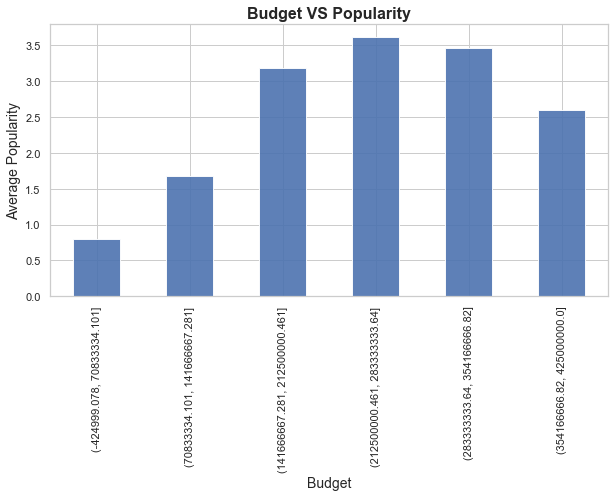

In [37]:
# call the cmp_bar function to level the budget column values and make plot with that.
asn.cmp_bar(movies_df, 'budget_adj', 'popularity', 6, 
       'Budget VS Popularity', 'Budget', 'Average Popularity')

> From the above plot we can see that with budget increase popularity also increase. Means movie budget is higher then the movie will be more popular.

Correlation Coefficient is:  0.4353363637


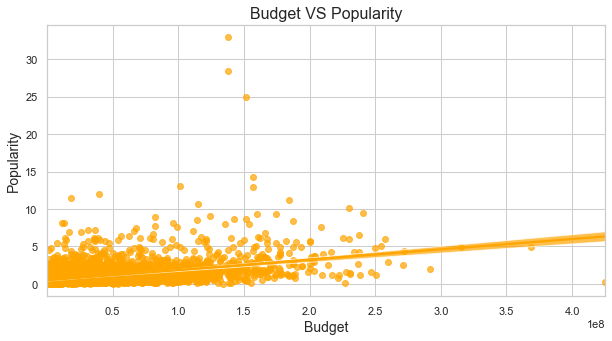

In [38]:
# create scatter plot to visualize the trend between "budget" and "popularity". And, call cmp_scatter function to make the plot.
asn.cmp_scatter(movies_df, 'budget_adj', 'popularity',
           'Budget VS Popularity', 'Budget', 'Popularity', 'orange')

> From the above plot we can see that **popularity** and **budget** are positively correlated. Correlation coefficient is **+0.44** means with budget increase there is a chance that movie will be more popular. Actually a movie with more budget is contentually rich that may be the reason of more popularity.

<br></br>

> Here we the relationship between popularity and rating of a movie. And devide the whole rating values' range into some levels and use that to create bar plot. Later we create scatter plot to visualize the trens between popularity and rating.

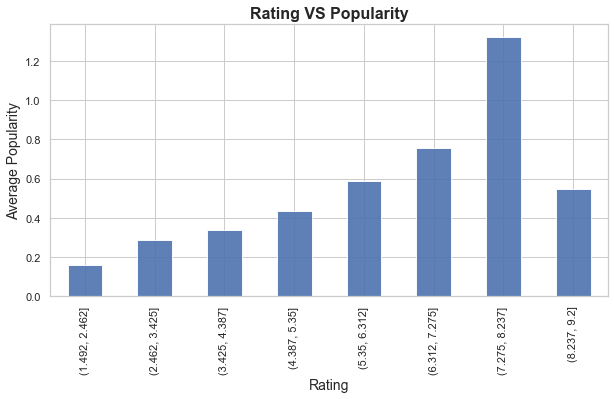

In [39]:
# Here we call cmp_bar function to create level based on rating values and make bar plot.
asn.cmp_bar(movies_df, 'vote_average', 'popularity', 8,
       'Rating VS Popularity', 'Rating', 'Average Popularity')

> From the above plot we can see that higher rated movies are more popular. Means if a movie is higher rated then it will be ore popular.

Correlation Coefficient is:  0.2095170141


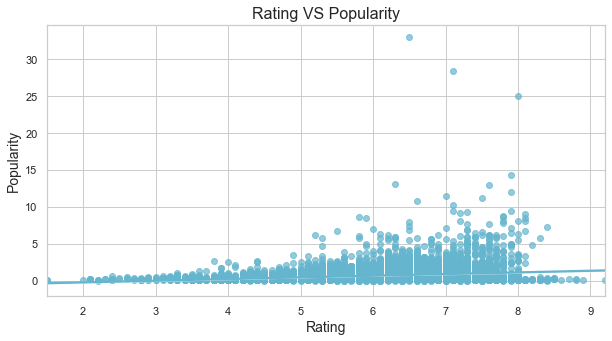

In [40]:
# Here we make a scatter plot to visualize the trend between rating and popularity. And, to make the plot we call cmp_scatter()
asn.cmp_scatter(movies_df, 'vote_average', 'popularity', 
           'Rating VS Popularity', 'Rating', 'Popularity', 'c')

> Above plot shows generally positive trend between rating and popularity. Correlation coefficient is **+0.21** which also suggest that a higher rated movie generally will be more popular.

### Q11: How revenue is releated to budget, rating and popularity?

> Here we find that is revenue related to budget, rating and popularity and if yes then how they are related to? Our objective is to find the depending factors of revenue of movies.

Correlation Coefficient is:  0.5923738673


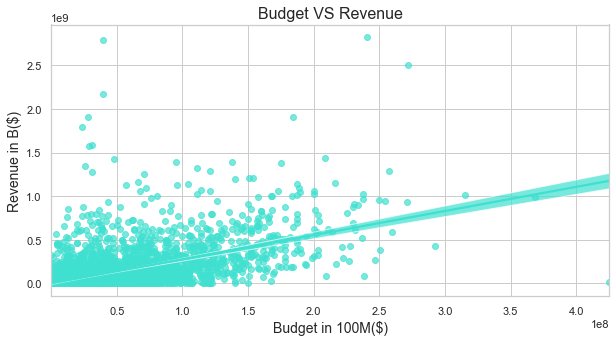

In [41]:
# Here we make scatter plot between budget and revenue.
asn.cmp_scatter(movies_df, 'budget_adj', 'revenue_adj',
           'Budget VS Revenue', 'Budget in 100M($)', 'Revenue in B($)', 'Turquoise')

> From teh above plot we can see that with budget increase revenue of the movie will generally increase. The correlation coefficient is **+0.60** which also suggests that higher budget movies will generate higher revenue.

Correlation Coefficient is:  0.6090853023


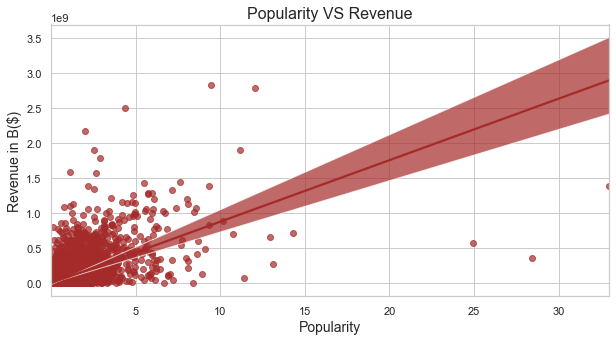

In [42]:
# Here we make scatter plot between popularity and revenue.
asn.cmp_scatter(movies_df, 'popularity', 'revenue_adj',
           'Popularity VS Revenue', 'Popularity', 'Revenue in B($)', 'brown')

> Above plot shows that more popular movies generate more revenue. Correlation coefficient is **+0.61** which suggests strong positive trend between popularity and revenue of a movie.

Correlation Coefficient is:  0.193062393


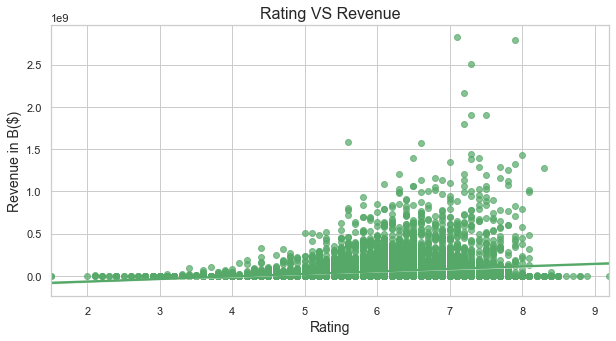

In [43]:
# Here we make scatter plot between rating and revenue.
asn.cmp_scatter(movies_df, 'vote_average', 'revenue_adj',
           'Rating VS Revenue', 'Rating', 'Revenue in B($)', 'g')

> Above plot shows that there is slight positive trend between rating and revenue of movies. Means there is chance that higher rated movie generated more revenue.

### Q12: How profit of a movie is releated to budget and popularity of that movie?

Correlation Coefficient is:  0.4249355244


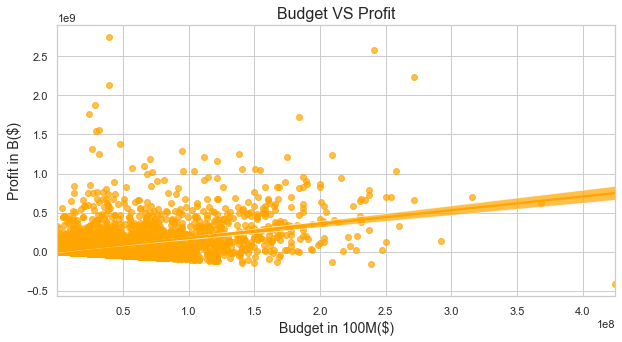

In [44]:
# Here we make scatter plot between budget and profit.
asn.cmp_scatter(movies_df, 'budget_adj', 'profit',
           'Budget VS Profit', 'Budget in 100M($)', 'Profit in B($)', 'orange')

>Above scatter plot and correlation coefficient suggest that a movie with more budget may earn more profit as that movie will be more rich in content.

Correlation Coefficient is:  0.5439362172


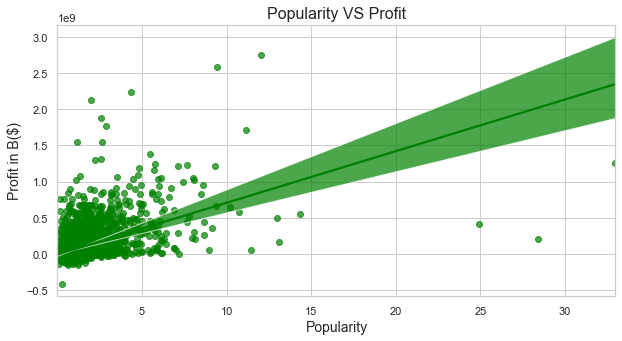

In [45]:
# Here we make scatter plot between popularity and profit.
asn.cmp_scatter(movies_df, 'popularity', 'profit',
           'Popularity VS Profit', 'Popularity', 'Profit in B($)', 'green')

>Correlation coefficient is positive and with high value of 0.54 . From the above evidence its expected that more popular movie will give more profit.

### Q13: With which genre maximum number of movies released? What are the number of movies released with all other genres?

Total unique genres 20 

Drama       4760
Comedy      3793
Thriller    2907
dtype: int64


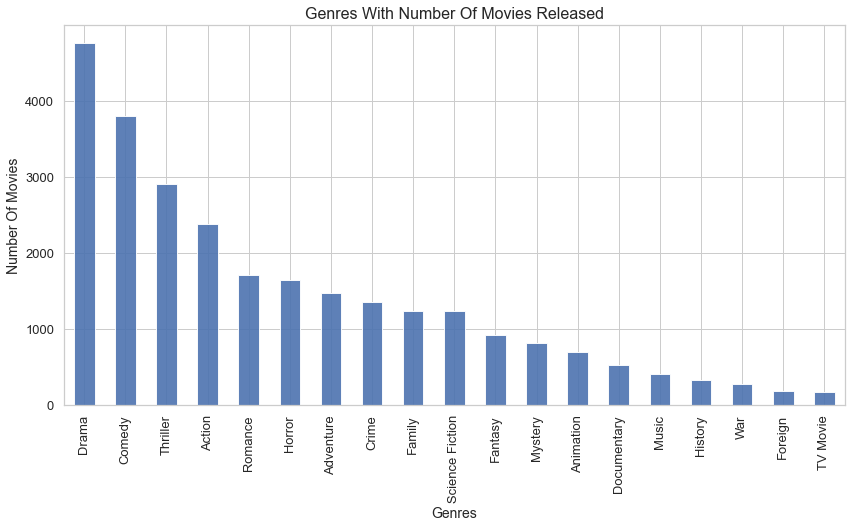

In [46]:
# Here we count the values of genres column and make a bar plot to see all the genres and how much movies are released
# on those genres. And, we call category_plot() to do that
asn.category_plot(movies_df, 'genres', -1, 'bar', 'Total unique genres {}',
             'Genres With Number Of Movies Released', 'Genres', 'Number Of Movies')

> From the above plot we can see that there are 20 unique genres and among them **Drama** genres has maximum number of movies released followed by **Comedy** and **Thriller**

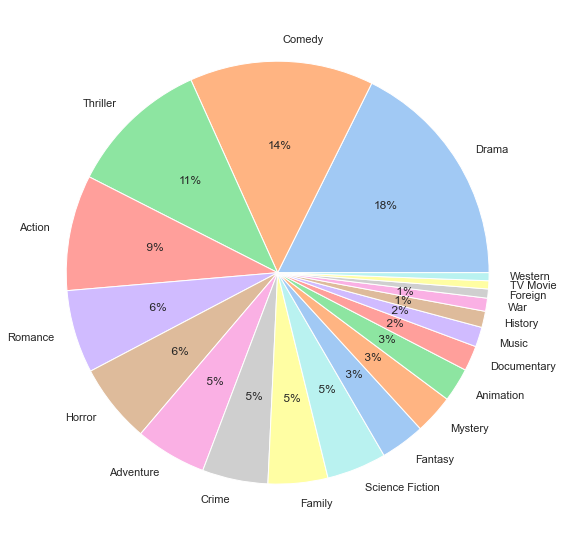

In [47]:
# Here we create a pie chart to visualize the share of each genres in the released movies.
genres = asn.count_category(movies_df, 'genres')
genres_cnt = []
for genre in genres.index:
    genres_cnt.append([genre, genres[genre]])
    
genres_cnt.sort(key=lambda x:x[1], reverse=True) # sort in descending order
labels, counts = zip(*genres_cnt) # upzip genres_cnt
labels = list(labels)

fig, ax = plt.subplots(figsize=(8,8))

# create pie chart
ax.pie(counts, labels=labels, 
      autopct=lambda x: '{:2.0f}%'.format(x) if x>1 else '',
      shadow=False, startangle=0, colors=sns.color_palette('pastel'))
ax.axis('equal')
plt.tight_layout()
plt.rc('font', weight='bold')

> From the above Pie chart we get an idea about the share of genres in the released movies.

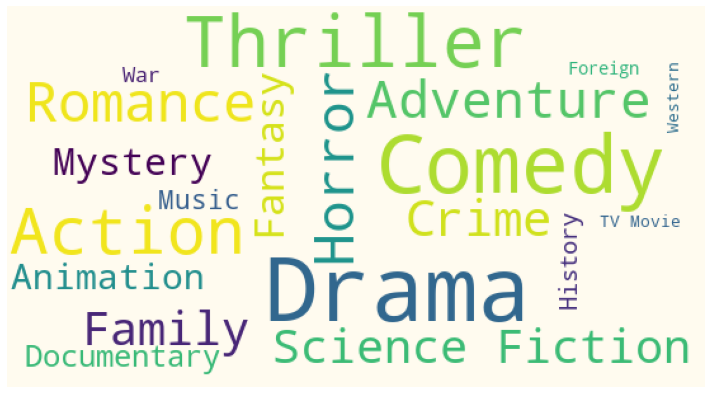

In [48]:
# here we create a wordcloud with the genres according to their share.
word = dict()
for g in genres_cnt:    # we create this enres_cnt with count_category() for the above pie chart
    word[g[0]] = g[1]
    
f, ax = plt.subplots(figsize=(14,7))
wordcloud = WordCloud(background_color='#FFFBEF', max_font_size=70, width=550, height=300)
wordcloud.generate_from_frequencies(word)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

> rom the above wordcloud we ccan visualize the share of genres in the released movies.

### Q14: Which are the more popular genres over the last three years? What are trends of the genres from year to year?

In [49]:
# Here we create visualization using average popularity.
genres_list = list(map(str, movies_df.genres))  # take the values of enres column in the list
labels.append('nan')  # this labels is created to make pie diagram above. Append 'nan' to that list

years = np.array(movies_df.release_year)
popularity = np.array(movies_df.popularity)

# Create two new dataframe popularity_df and count_genre_year and set the values of all cells to 0.0
popularity_df = pd.DataFrame(index=labels, columns=range(1960,2016))
count_genre_year = pd.DataFrame(index=labels, columns=range(1960,2016))
popularity_df.fillna(value=0.0, inplace=True)
count_genre_year.fillna(value=0.0, inplace=True)

In [50]:
# MOdify the values of the above two dataframe.
yr = 0
for genre in genres_list:
    split_genre = list(map(str, genre.split('|')))
    popularity_df.loc[split_genre, years[yr]] = popularity_df.loc[split_genre, years[yr]] + popularity[yr]
    count_genre_year.loc[split_genre, years[yr]] = count_genre_year.loc[split_genre, years[yr]] + 1
    yr+=1

In [51]:
# check rows of popularity_df dataframe
popularity_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Drama,7.361967,6.915731,8.232008,4.191829,7.296370,6.105756,5.436264,8.183477,7.546450,6.368528,6.015169,12.093149,11.127861,14.752277,11.044738,9.498630,12.950282,10.135370,10.224622,14.241453,11.989758,11.488054,17.947000,15.553380,20.561504,21.213402,25.277879,23.484044,23.002272,22.881965,31.120535,26.615180,29.433028,50.140873,59.878062,60.142269,59.870250,49.284153,62.846816,72.207569,48.484162,64.486478,73.772566,56.632511,81.638235,96.903950,109.448943,109.945124,123.854529,126.897208,123.118794,128.088313,140.376994,166.999176,246.362717,243.848091
Comedy,3.168003,6.798382,1.365917,5.778254,7.859657,2.511049,5.178531,7.391972,2.965935,3.246052,5.336434,3.576622,3.534842,3.495928,5.303014,7.205788,3.869832,5.392350,5.702618,9.157434,10.953857,8.020659,10.942187,14.816144,22.089255,31.857277,23.247835,27.906589,34.307900,33.557534,22.102016,26.626168,32.115571,40.151085,51.361393,41.309913,43.914696,48.707694,49.093226,49.067837,51.696602,61.301457,63.644530,66.308559,85.549790,87.115889,97.197895,79.415945,86.858673,111.045444,99.039863,115.304366,104.231064,105.688203,160.332602,152.041317
Thriller,4.871460,0.000000,5.324075,7.199292,5.603219,3.773787,2.190952,3.509897,2.779596,2.613848,1.270518,8.575274,3.514436,9.785091,9.109837,5.941903,8.553097,5.336332,9.822871,13.272755,8.332210,9.960427,16.430695,15.102143,14.386681,12.956245,12.005857,19.121810,18.086227,18.519812,24.859970,21.617868,28.534400,26.507158,35.334756,41.624069,43.980467,55.576138,33.118677,37.976014,38.750215,44.034658,56.810878,60.874814,54.433186,58.268825,75.973838,92.120424,86.206629,102.665018,99.392674,116.041838,108.295298,128.550095,186.504459,239.720907
Action,4.725796,2.561389,5.671563,3.806916,4.065433,4.062358,3.686859,5.064989,2.193374,5.399760,2.658147,6.605274,3.247743,8.464960,5.867692,2.670626,5.274133,19.870465,7.212245,11.280114,16.057688,12.134078,10.145563,17.877840,25.232337,17.065825,19.693106,18.982814,19.168541,29.888013,25.002360,23.650392,19.765011,29.465490,34.456258,37.283655,35.732844,47.732500,32.659219,35.233305,32.233180,45.788183,65.101490,83.196715,69.477261,62.177370,60.259233,72.254120,88.585296,93.794086,100.116607,121.681073,111.986677,122.089178,216.979690,240.901421
Romance,3.247365,2.982255,1.828107,3.196581,1.994275,3.113899,2.111415,4.591895,1.562137,1.153067,1.907536,3.376106,2.112123,1.654408,1.447938,1.197705,1.783460,2.659982,1.376707,3.007557,5.052617,4.741710,3.747889,7.072301,9.218884,10.288860,10.467295,11.235411,10.284950,9.099672,12.095752,12.508977,11.695990,17.986177,26.840514,21.203998,23.221912,21.073733,22.955817,21.475432,20.047181,37.276434,32.511903,28.199728,46.206991,40.296693,42.824858,39.021882,54.586724,50.982405,53.865920,50.677041,51.936521,39.702135,52.850344,54.085299


In [52]:
# check some rows of count_genre_year
count_genre_year.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Drama,13.0,16.0,21.0,13.0,20.0,20.0,16.0,16.0,20.0,13.0,19.0,30.0,16.0,31.0,21.0,17.0,22.0,24.0,29.0,30.0,32.0,32.0,33.0,35.0,40.0,40.0,51.0,52.0,54.0,54.0,60.0,63.0,65.0,90.0,83.0,93.0,104.0,83.0,108.0,113.0,101.0,100.0,130.0,110.0,141.0,182.0,197.0,197.0,233.0,224.0,210.0,214.0,232.0,253.0,284.0,260.0
Comedy,8.0,10.0,5.0,13.0,16.0,7.0,16.0,17.0,9.0,12.0,12.0,9.0,13.0,8.0,12.0,12.0,12.0,11.0,14.0,19.0,25.0,20.0,28.0,28.0,38.0,51.0,49.0,57.0,69.0,63.0,48.0,60.0,54.0,72.0,88.0,63.0,91.0,77.0,84.0,100.0,97.0,101.0,104.0,111.0,125.0,143.0,155.0,151.0,169.0,198.0,169.0,172.0,176.0,175.0,185.0,162.0
Thriller,6.0,0.0,7.0,10.0,9.0,11.0,8.0,5.0,5.0,3.0,5.0,17.0,10.0,16.0,20.0,13.0,17.0,12.0,22.0,16.0,25.0,27.0,17.0,24.0,24.0,24.0,23.0,28.0,33.0,35.0,46.0,37.0,45.0,45.0,45.0,49.0,61.0,61.0,53.0,53.0,63.0,66.0,84.0,73.0,74.0,92.0,114.0,125.0,127.0,157.0,134.0,146.0,160.0,175.0,179.0,171.0
Action,8.0,7.0,8.0,4.0,5.0,9.0,14.0,7.0,6.0,10.0,11.0,11.0,10.0,15.0,14.0,10.0,13.0,14.0,15.0,8.0,27.0,17.0,17.0,21.0,33.0,28.0,30.0,29.0,32.0,38.0,39.0,39.0,34.0,53.0,61.0,47.0,42.0,59.0,43.0,38.0,47.0,61.0,72.0,73.0,75.0,70.0,80.0,95.0,99.0,108.0,107.0,115.0,99.0,121.0,129.0,107.0
Romance,6.0,7.0,5.0,8.0,9.0,5.0,6.0,11.0,6.0,4.0,6.0,9.0,5.0,3.0,4.0,2.0,5.0,4.0,5.0,8.0,9.0,10.0,12.0,14.0,19.0,21.0,25.0,24.0,19.0,22.0,19.0,26.0,31.0,34.0,35.0,37.0,44.0,32.0,41.0,42.0,47.0,53.0,48.0,49.0,63.0,62.0,70.0,74.0,84.0,83.0,85.0,75.0,79.0,65.0,84.0,57.0


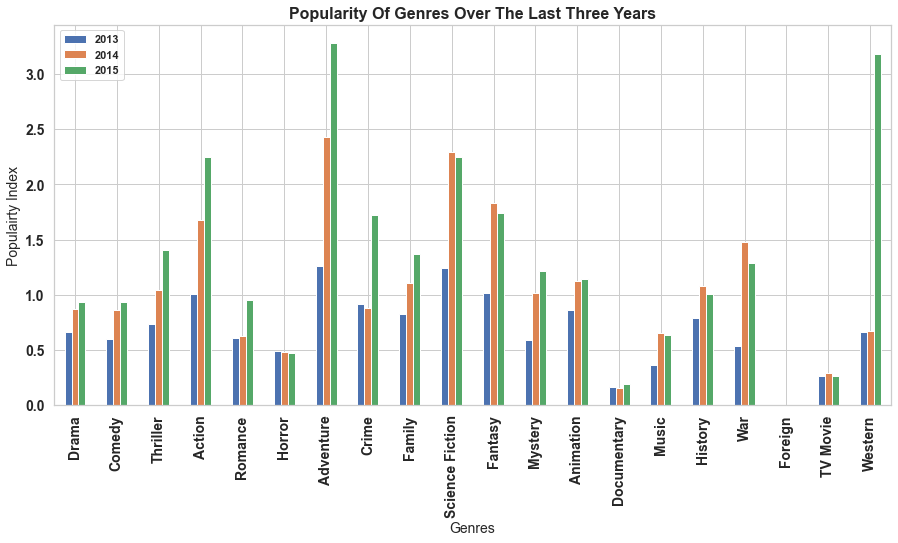

In [53]:
# Here we perform vector division between popularity_df and count_genre_in_year to get average popularity of each genre in
# a particular year. Average is taken because in every year different numbers of movies released related to the genres.
popular_genre_df = popularity_df.divide(count_genre_year)

# Here we make plot see popularity of genres over the last three years. And call category_over_yr() for this purpose
df = popular_genre_df.iloc[:20, 53:]
asn.category_over_yr(df, 'Popularity Of Genres Over The Last Three Years', 'Genres', 'Populairty Index')

> From the above plot we can in the year 2015 **Adventure**, **Western** and **Science Fiction** genres were more popular.

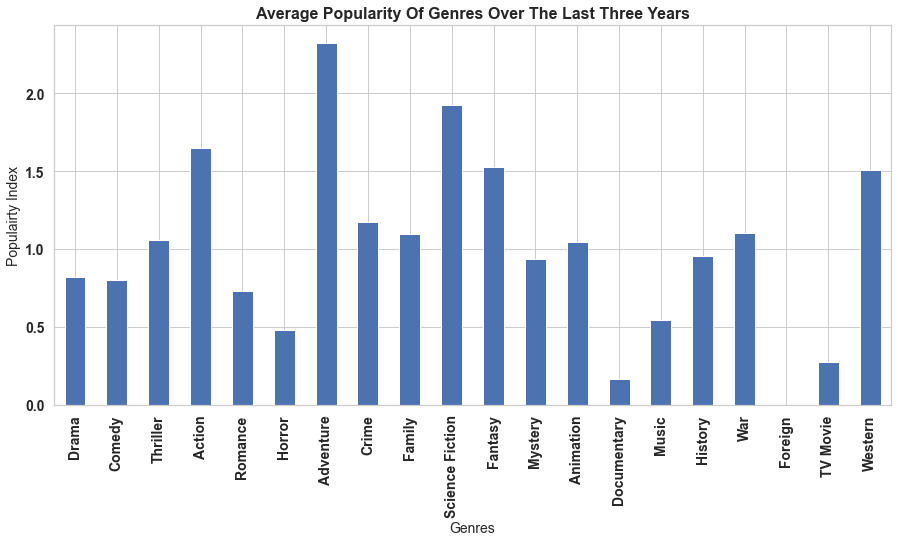

In [54]:
# Here we create a plot to see average popularity of genres over the last three years. Call category_over_yr()
df = popular_genre_df.iloc[:20, 53:].sum(axis=1).divide(3)
asn.category_over_yr(df, 'Average Popularity Of Genres Over The Last Three Years', 'Genres', 'Populairty Index')

> From the above plot we can see **Adventure**, **Science Fiction** and **Action** are the top three most popular genres over the last three years.

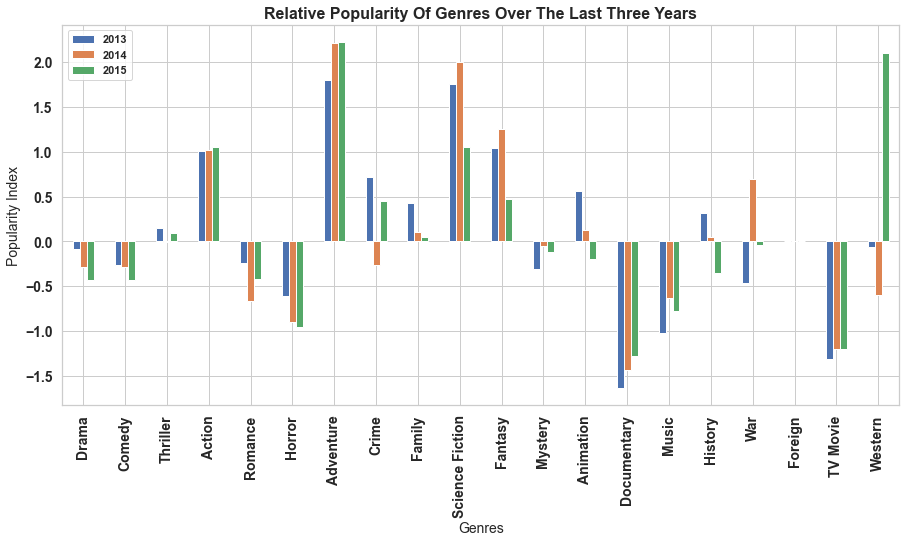

In [56]:
# Here we standerize the values of popularity_genre_df dataframe
rel_popular_genre = asn.standerize(popular_genre_df)

# Create bar plot to visualize relative popularity of the genres over the last three years
df = rel_popular_genre.iloc[:20, 53:]
asn.category_over_yr(df, 'Relative Popularity Of Genres Over The Last Three Years',
                'Genres', 'Popularity Index')

> From teh above plot we can see relative popularity of the genres over the last three years. And, most popular ggenre is **Adventure** and least popular genre is **Documentary**.

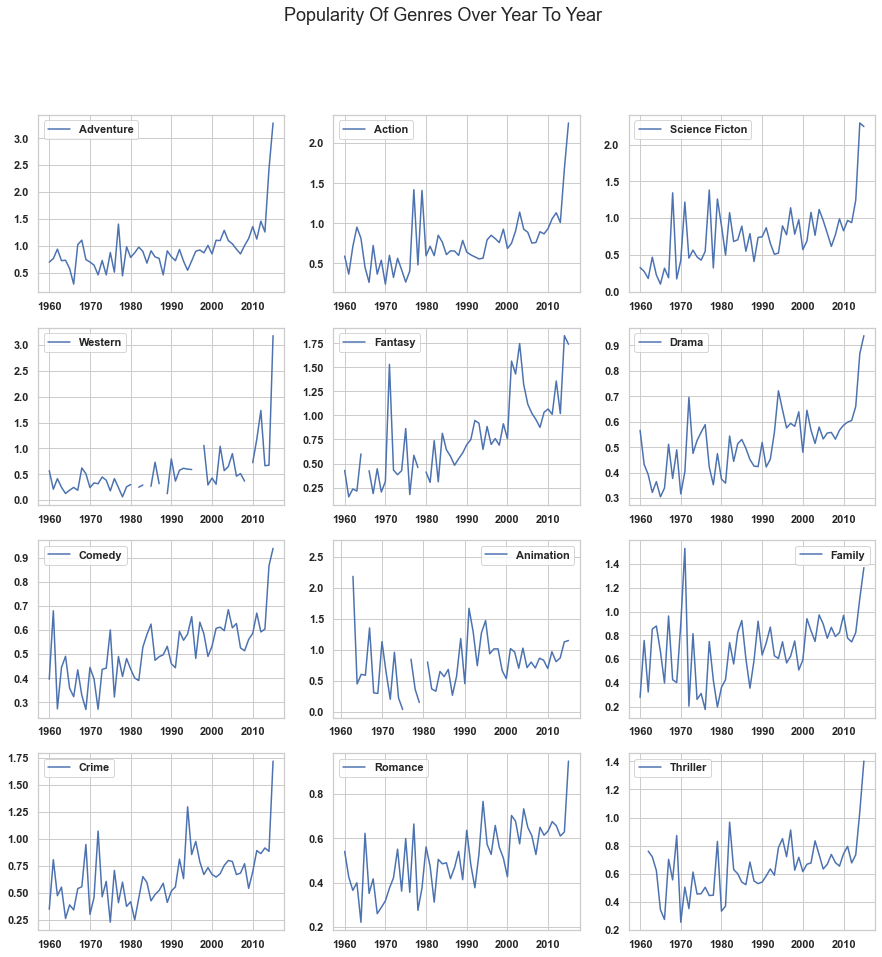

In [57]:
# Here we create subplots to see the over all trends of the genres.
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
fig.suptitle('Popularity Of Genres Over Year To Year', fontsize=18);

popular_genre_df.loc['Adventure'].plot(label='Adventure', ax=ax[0][0], legend=True);
popular_genre_df.loc['Action'].plot(label='Action', ax=ax[0][1], legend=True);
popular_genre_df.loc['Science Fiction'].plot(label='Science Ficton', ax=ax[0][2], legend=True);
popular_genre_df.loc['Western'].plot(label='Western', ax=ax[1][0], legend=True);
popular_genre_df.loc['Fantasy'].plot(label='Fantasy', ax=ax[1][1], legend=True);
popular_genre_df.loc['Drama'].plot(label='Drama', ax=ax[1][2], legend=True);
popular_genre_df.loc['Comedy'].plot(label='Comedy', ax=ax[2][0], legend=True);
popular_genre_df.loc['Animation'].plot(label='Animation', ax=ax[2][1], legend=True);
popular_genre_df.loc['Family'].plot(label='Family', ax=ax[2][2], legend=True);
popular_genre_df.loc['Crime'].plot(label='Crime', ax=ax[3][0], legend=True);
popular_genre_df.loc['Romance'].plot(label='Romance', ax=ax[3][1], legend=True);
popular_genre_df.loc['Thriller'].plot(label='Thriller', ax=ax[3][2], legend=True);

> From the above subplots we can see most of the genres have upward trend of popularity over the years.

### Q15: Which actor did maximum number of movies? Who are the top actors according to the number of movies he(she) did? Who are the top profitable actors?

Top 3 actors and number of movies they did 

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
dtype: int64


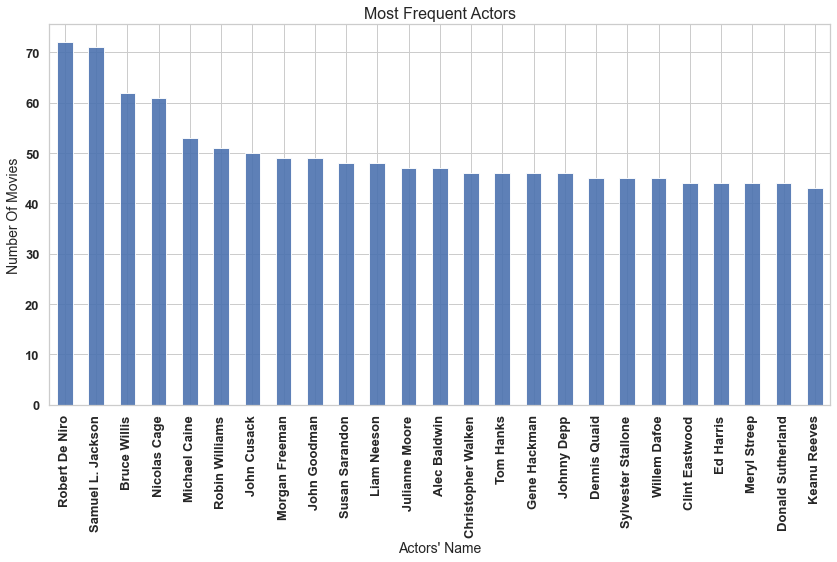

In [58]:
# Here we create a bar diagram to see how many movies top 25 actors did. 
asn.category_plot(movies_df, 'cast', 25, 'bar', 'Top 3 actors and number of movies they did',
             'Most Frequent Actors', 'Actors\' Name', 'Number Of Movies')

> From the above bar diagram we can see **Robert De Niro** acted in 72 movies with highest number of movies. And followed by **Samuel L. Jackson** with 71 movies and **Bruce Willis** with 62 movies.

In [59]:
# Here we create two new dataframe with the objective of finding profitable casts.
casts = asn.count_category(movies_df, 'cast')
total_cast = list(map(str, (movies_df.cast)))
cast_list = casts.index.to_list()
cast_list.append('nan')
profit = np.array(movies_df.profit)

# create two dataframe profit_df and count_cast_df
profit_df = pd.DataFrame(index=cast_list, columns=['Average Profit'])
count_cast_df = pd.DataFrame(index=cast_list, columns=['Average Profit'])
profit_df.fillna(value=0.0, inplace=True)
count_cast_df.fillna(value=0.0, inplace=True)

# modify the values of the dataframes
y=0
for cast in total_cast:
    split_cast = list(map(str, cast.split('|')))
    profit_df.loc[split_cast] = profit_df.loc[split_cast] + profit[y]
    count_cast_df.loc[split_cast] = count_cast_df.loc[split_cast] + 1
    y+=1

In [60]:
# Here we perform vector division to get average profit per actor.
profitable_actor_df = profit_df.divide(count_cast_df)
profitable_actor_df.sort_values(by='Average Profit', ascending=False, inplace=True)
profitable_actor_df.head()

,Average Profit
Robert MacNaughton,1.767968e+09
Daisy Ridley,1.718723e+09
Ben Wright,1.545635e+09
Betty Lou Gerson,1.545635e+09
J. Pat O'Malley,1.545635e+09


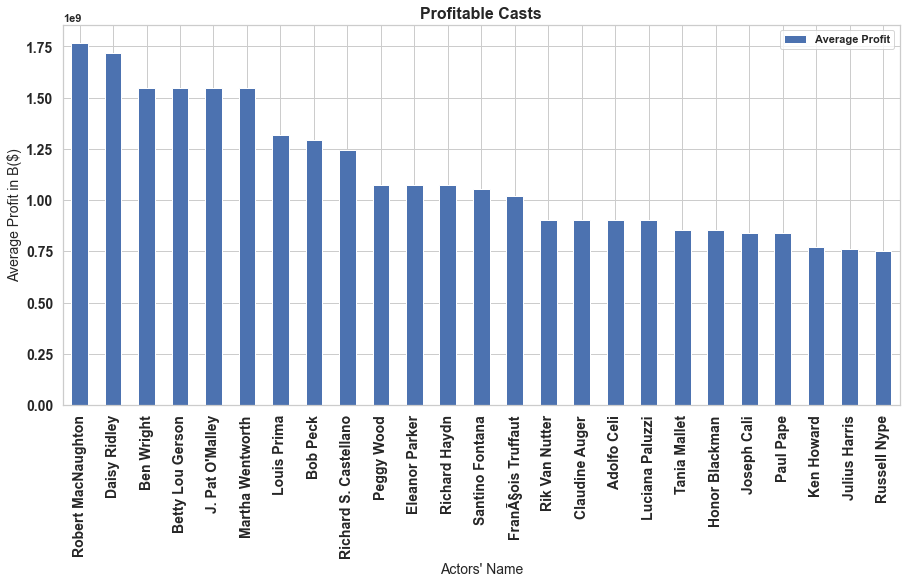

In [61]:
# Make a plot to see top 25 profitable casts
asn.category_over_yr(profitable_actor_df.iloc[:25], 'Profitable Casts', 'Actors\' Name', 'Average Profit in B($)')

> From the above plot we can see top 25 most profitable actors in the production industry.

### Q16: Which production company releassed maximum number of movies? Which are the top production companies in movie making?

Top 3 production companies with number of movies released: 

Universal Pictures    522
Warner Bros.          509
Paramount Pictures    431
dtype: int64


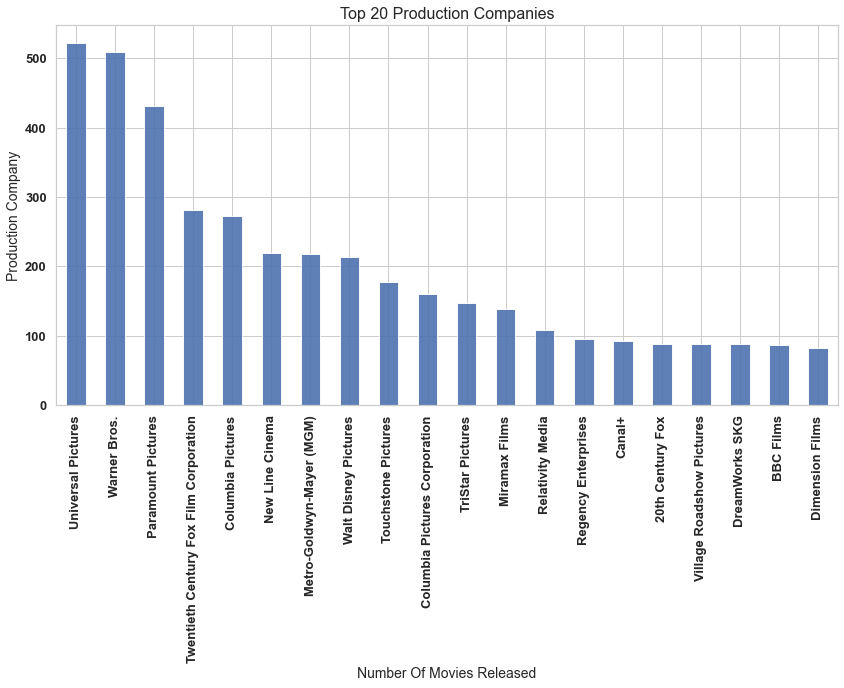

In [62]:
# Here we make plot to see top 20 production companies according to number of movies released.
asn.category_plot(movies_df, 'production_companies', 20, 'bar', 'Top 3 production companies with number of movies released:',
             'Top 20 Production Companies', 'Number Of Movies Released', 'Production Company')

> Above plot shows that **Universal Pictures** is the top production company with 522 released movies. Followed by **Warner Bros.** and **Paramount Pictures**

### Q17: How much profits top production companies earned for the life time?

In [63]:
# Here we create a new dataframe companies_df for ouor analysis
production_company = asn.count_category(movies_df, 'production_companies').index.to_list()
production_company.append('nan')
production_company_values = list(map(str, movies_df.production_companies))

movies_df.profit.replace(np.NAN, 0, inplace=True) # replace nan with 0
profit = np.array(movies_df.profit)

# create new dataframe 
companies_df = pd.DataFrame(index=production_company, columns=['Total Profit'])
companies_df.fillna(value=0.0, inplace=True)

# modify the values of the dataframe
y=0
for company in production_company_values:
    company_list = list(map(str, company.split('|')))
    companies_df.loc[company_list, 'Total Profit'] = companies_df.loc[company_list, 'Total Profit'] + profit[y]
    y+=1

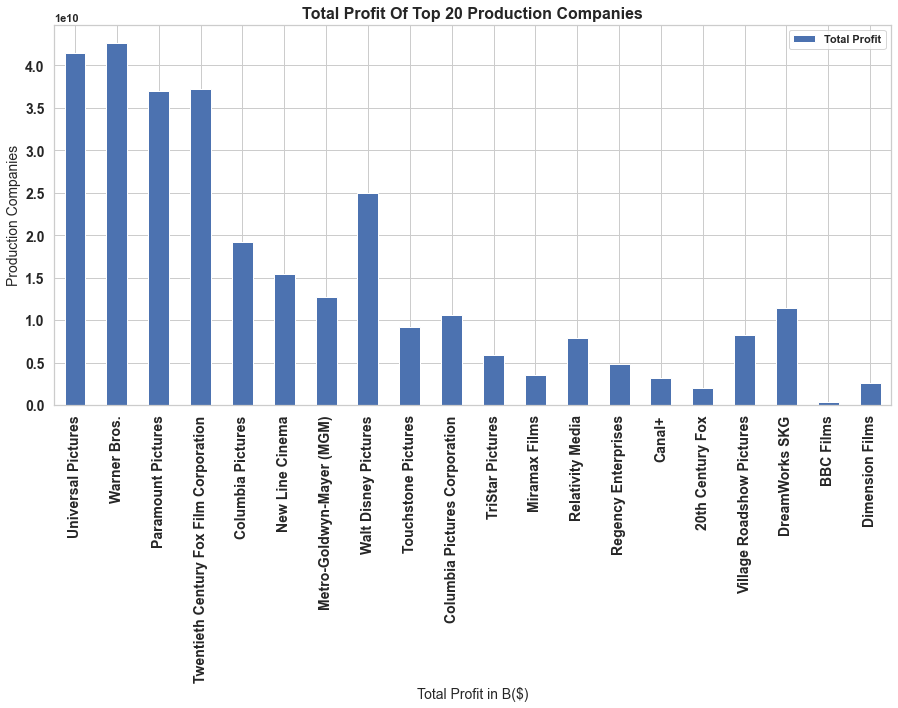

In [64]:
# Here we make plot to see profit of top 20 production companies
asn.category_over_yr(companies_df.iloc[:20], 
                 'Total Profit Of Top 20 Production Companies', 'Total Profit in B($)', 'Production Companies')

> Here we can see profits of top20 production companies. **Warner Bros** made the highest profit till 2015.

### Q18: Which director directed maximum number of movies? Who are the top directors?

Top 3 directors and the number of movies they released 

Woody Allen        46
Clint Eastwood     34
Martin Scorsese    31
dtype: int64


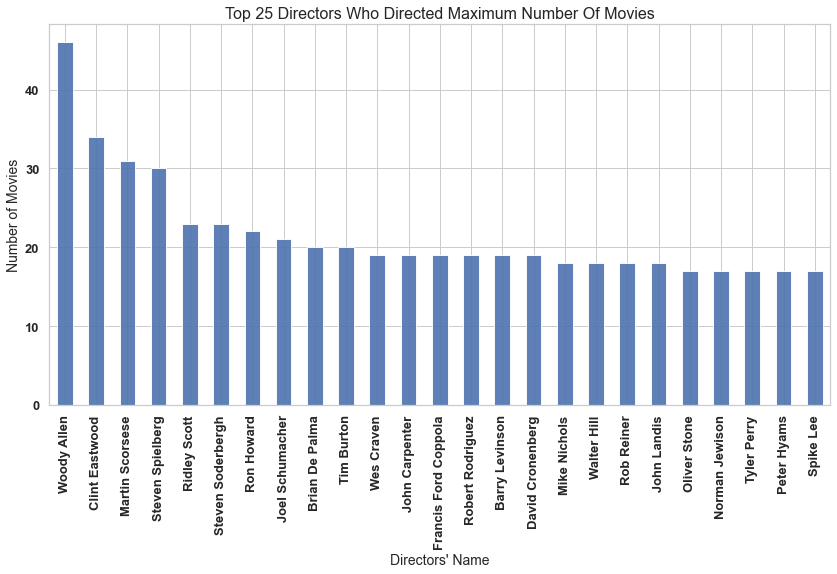

In [65]:
# Here we make a plot to see top 25 directors and the number of movies they released.
asn.category_plot(movies_df, 'director', 25, 'bar', 'Top 3 directors and the number of movies they released',
             'Top 25 Directors Who Directed Maximum Number Of Movies', 'Directors\' Name', 'Number of Movies')

> From the above visualizations we can say 'Woody Allen' directed 46 movies with the maximum number of movies. And followed by 'Clint Eastwood' with 34 and 'Martin Scorsese' with 31 movies.

### Q19: Which are the most popular keywords?

[['woman director', 413], ['independent film', 396], ['based on novel', 278], ['sex', 272], ['sport', 216]]


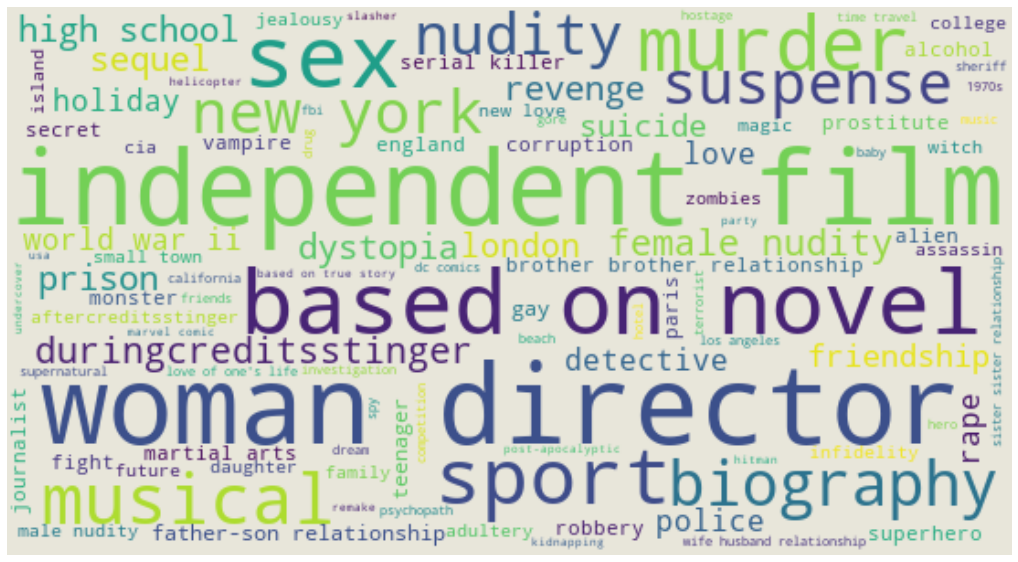

In [66]:
# Here we create a wordcloud to visualize the most popular keywords.
keywords_count = asn.count_category(movies_df, 'keywords')
keywords_list = []
for key in keywords_count.index:
    keywords_list.append([key, keywords_count[key]])
    
print(keywords_list[:5]) # Print top 5 popular keywords
keywords = dict()

# Get the top 100 keywords
for kw in keywords_list[:100]:
    keywords[kw[0]] = kw[1]
    
# plot wordcloud to visualize top 100 popular keywords
f, ax = plt.subplots(figsize=(18,14))
wordcloud = WordCloud(background_color='#E8E6DA', max_font_size=60, width=550, height=300)
wordcloud.generate_from_frequencies(keywords)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

> From the above visualization we can say that top 5 popular keywords are 'woman director', 'independent film', 'based on novel', 'sex', 'sport'.

### Q20: What are the correlations between budget, revenue, profit, vote_average and popularity?

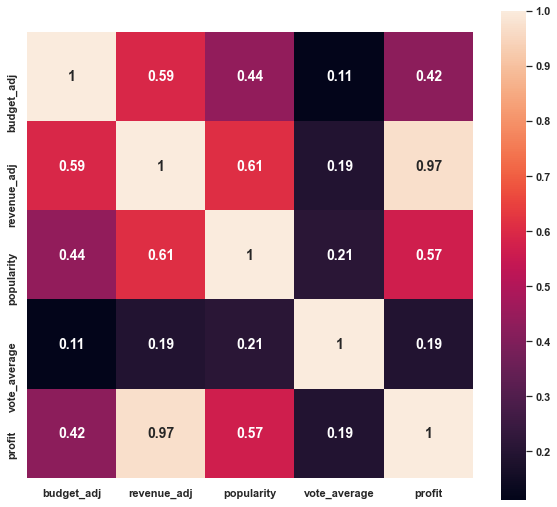

In [67]:
# We create a function correlation_map which take a dataframe as an argument and plot a square dataset
# Here we find the correlation coefficients between 'budget', 'revenue', 'profit', 'vote_average' and 'popularity'
def correlation_map(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(10,10))
    _ = sns.heatmap(corr, square=True, cbar_kws={'shrink':.9}, ax=ax, annot=True, annot_kws={'fontsize':14})
    
correlation_map(movies_df[['budget_adj','revenue_adj','popularity','vote_average','profit']])

> From the above square dataset we can find that how much the factors are dependant on each other. From this chart we get an overall visualization about all the varying factors and how they related to the others varying factors.

In [68]:
# Create a dataframe with top 5 from 'cast', 'director', 'keywords' and 'genres'
cast = asn.count_category(movies_df, 'cast').index.tolist()
directors = asn.count_category(movies_df, 'director').index.tolist()
keywords = asn.count_category(movies_df, 'keywords').index.tolist()
genres = asn.count_category(movies_df, 'genres').index.tolist()
popular_df = pd.DataFrame({'Popular Cast':cast[:5], 'Popular Director':directors[:5],
                           'Popular Keywords':keywords[:5], 'Popular Genres':genres[:5]})
popular_df

,Popular Cast,Popular Director,Popular Keywords,Popular Genres
0,Robert De Niro,Woody Allen,woman director,Drama
1,Samuel L. Jackson,Clint Eastwood,independent film,Comedy
2,Bruce Willis,Martin Scorsese,based on novel,Thriller
3,Nicolas Cage,Steven Spielberg,sex,Action
4,Michael Caine,Ridley Scott,sport,Romance


<br></br>

<div id="conclusions"></div>

## Conclusions of the Analysis:

<div style="font-size:16px">
    
Primary objective of this analysis is to explore two parts, one is quantitative parts and another is categorical parts.
    
    
   - Part One: Find the quantitative features of a successful movie.
     I explore some questions about quantitative features to find dependencies of a successful movie. I found the following -
        - Popularity of movie depends on budget. It means a movie with higher budget  is expected to be more popularity.
        - Popularity of movies also depend on runtime. We can see movies with runtime less that 30 min is most popular and movies with runtime 61 to 90 min least popular.
        - Profit earned by a movie is largly depends on budget and the popularity of the movie. As high budget movie will be contentually more rich and generates interest to the audience and profit will be generated. And, profit and rating is not related to each other.
        - Rating of a movie slightly depends on budget but more affected by the popularity.
        - Movies released in recent years are shorter than the movies released long years back.
        - Runtime does not affect the rating of movie.
   - Part Two: Find categorical features of a successful movie.
      I explore categorical features such as cast, director, keywords, genres etc to find successful movie dependencies. I found the following -
        - More movies released with these genres 'Drama', 'Comedy', 'Thriller', 'Action' though most popular genres in the last three years are 'Adventure', 'Science Fiction', 'Action', 'Fantasy'.
        - More popular keywords are 'Woman director', 'Independent Film', 'Based on novel', 'sex', 'sport'.
        - Top three profitable casts are 'Daisy Ridley', 'Santino Fontana' and 'Bob Peck'.

</div>


<div id="result"></div>

## Communicate the results:
<br></br>

<div style="font-size:16px">

This analysis is based on a TMDB movie dataset that contains around 11000 movies. Goal of this analysis is to get an overview of this large dataset, get an idea of the trends of varying factors over the years, get the dependant foctors of the successful movies. For the shake of analysis I drawn different kinds of chart and modify the dataframe accordingly. And from the analysis we can draw this conclusion that - a movie that is built with more budget, and with more popular genres and cast and with more popular keywords will be more successfull. Though this has following limitations -

</br>

### Limitations:
   - There are 0 values in budget and revenue, but that is not possible in real. And so, those are modyfied according to necessity of analysis. Hence analysis on total realistic dataset may differ from these results.
   - For ease of analysis mean of varying factors are used, so the analysis that deeply interact with the dataset by various process may differ from this analysis somehow.
   - This analysis is based on statistical measurements to get an approximation and visualization. Though these methods are scientifically approved for analysis, some real case scenarios may differ from these results of the analysis.
    
</div>

<div id="ref"></div>

## Referrences:

<div style="font-size:16px">

<ul>
    <li><a href="https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf">TMDB Dataset</a></li>
    <li><a href="https://docs.scipy.org/doc/numpy/">Numpy</a></li>
    <li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/index.html#api">Pandas</a></li>
    <li><a href="https://matplotlib.org/3.2.1/contents.html">Matplotlib</a></li>
    <li><a href="https://medium.com/@onpillow/01-investigate-tmdb-movie-dataset-python-data-analysis-project-part-1-data-wrangling-3d2b55ea7714">Medium Article</a></li>
    
</ul>

</div>